# **Final Report: Restaurant Revenue Analysis**  
## STAT 301 102 - Statistical Modelling for Data Science
### University of British Columbia  

---

**Group Members:**  
- Aryan Java Williams  
- Eva Ma
- Kevin Shiao
- Xuanzhang Zheng

# Introduction

The restaurant industry is a highly competitive market with intense competition among fellow restaurateurs to attract customers and earn their loyalty. Many businesses are unable to maintain long-term sustainability in their restaurants, and 60% of these restaurants close within 3 years (Yi et al., 2018). With a wide array of dining choices available, it is key for restaurant owners to offer a sense of individuality that not only attracts customers but fosters long-term engagement as well. Whether it be through innovative marketing tactics, implementing more promotional strategies, or tailoring cuisine type based on the local demographic, there are many factors that may influence the customer's interest in dining at a particular restaurant. 

Understanding the importance of these elements can help restaurants make informed and strategic promotional and operational decisions to improve their customer foot traffic. As stated by Liu & Tse (2018), meeting customer expectations is vital for a restaurant's operational survival. It is therefore a pivotal step to identify and pinpoint the factors that are closely linked to customer volume. The intention behind this report is to conduct a Poisson regression analysis to explore the variables associated with the number of customers in a restaurant, while providing data-driven insight to remain competitive in a saturated market and increase customer turnout. 

>**Is there an association between menu price, marketing spend, cuisine type, promotions, reviews, monthly revenue, and customer spend on the number of customers dining at a restaurant?**

This question aims to perform an inference-based investigation into understanding the relationship between the number of customers and how these explanatory variables influence customer count. 


# Methods and Results

## Import Statements

In [2]:
library(tidyverse)
library(repr)
library(cowplot)
library(broom)
library(GGally)
library(dplyr)
library(ggplot2)
library(readr)
library(rsample)
library(leaps)
library(MASS)
library(car)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘cowplot’


The following object is masked from ‘package:lubridate’:

    stamp


Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2


Attaching package: ‘MASS’


The following object is masked from ‘package:dplyr’:

    select


Loading required package: carData


Attaching package: ‘car’


The following object is masked from ‘package:dplyr’:

    recode


The following object is masked from ‘package:purrr’:

    some




## Data

The dataset assigned to our group is the **Restaurant Revenue Predictions Dataset**. It includes various attributes of simulated restaurants, allowing us to forecast their performance based on multiple factors created by MrSimple07 accessed via Kaggle. 

This dataset contains 2000 observations each with 8 variables, consisting of: number of customers, menu price, marketing spend, cuisine type, average customer spending, promotions, reviews, and monthly revenue. 4 columns are represented by decimal values, 3 columns encapsulate integer values, and 1 column represents string values. 

There are 1000 observations in our dataset. The variables within the Dataset are 
- `Number_of_Customers`: Number of customers visiting the restaurant *(int)*
- `Menu_Price`: Average price of menu items at the restaurant *(float)*
- `Marketing_Spend`: Amount of money spent on marketing activities *(float)*
- `Cuisine_Type`: Name of the type of cuisine offered at the restaurant, one of: Italian, Mexican, Japanese, American *(string)*
- `Average_Customer_Spending`: Average amount that the customer spends in the restaurant *(float)*
- `Promotions`: Whether or not promotions were applied; 0 means no, 1 means yes *(int)*
- `Reviews`: Number of reviews for the restaurant *(int)*
- `Monthly_Revenue`: simulated monthly revenue for the restaurant *(float)*

In [3]:
#load the data
url <- "https://raw.githubusercontent.com/evamaa/stat-301-restaurant-revenue/refs/heads/main/Restaurant_revenue%20(1).csv"
restaurant <- read_csv(url)
head(restaurant)

Rows: 1000 Columns: 8
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): Cuisine_Type
dbl (7): Number_of_Customers, Menu_Price, Marketing_Spend, Average_Customer_...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Number_of_Customers,Menu_Price,Marketing_Spend,Cuisine_Type,Average_Customer_Spending,Promotions,Reviews,Monthly_Revenue
<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
61,43.11764,12.663793,Japanese,36.23613,0,45,350.9120
24,40.02008,4.577892,Italian,17.95256,0,36,221.3191
81,41.98149,4.652911,Japanese,22.60042,1,91,326.5298
70,43.00531,4.416053,Italian,18.98410,1,59,348.1906
30,17.45620,3.475052,Italian,12.76614,1,30,185.0091
92,19.42767,13.114473,American,43.09995,1,10,399.8675



include a citation of its source


include any information you have about data collection (e.g., observational vs experimental)


## Exploratory Data Analysis (EDA)

In [3]:
#tidy the data
restaurant_data <- restaurant %>%
    mutate(Cuisine_Type = as.factor(Cuisine_Type)) 
head(restaurant_data)
nrow(restaurant_data)

Number_of_Customers,Menu_Price,Marketing_Spend,Cuisine_Type,Average_Customer_Spending,Promotions,Reviews,Monthly_Revenue
<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>
61,43.11764,12.663793,Japanese,36.23613,0,45,350.9120
24,40.02008,4.577892,Italian,17.95256,0,36,221.3191
81,41.98149,4.652911,Japanese,22.60042,1,91,326.5298
70,43.00531,4.416053,Italian,18.98410,1,59,348.1906
30,17.45620,3.475052,Italian,12.76614,1,30,185.0091
92,19.42767,13.114473,American,43.09995,1,10,399.8675


[1] 1000

`geom_smooth()` using formula = 'y ~ x'


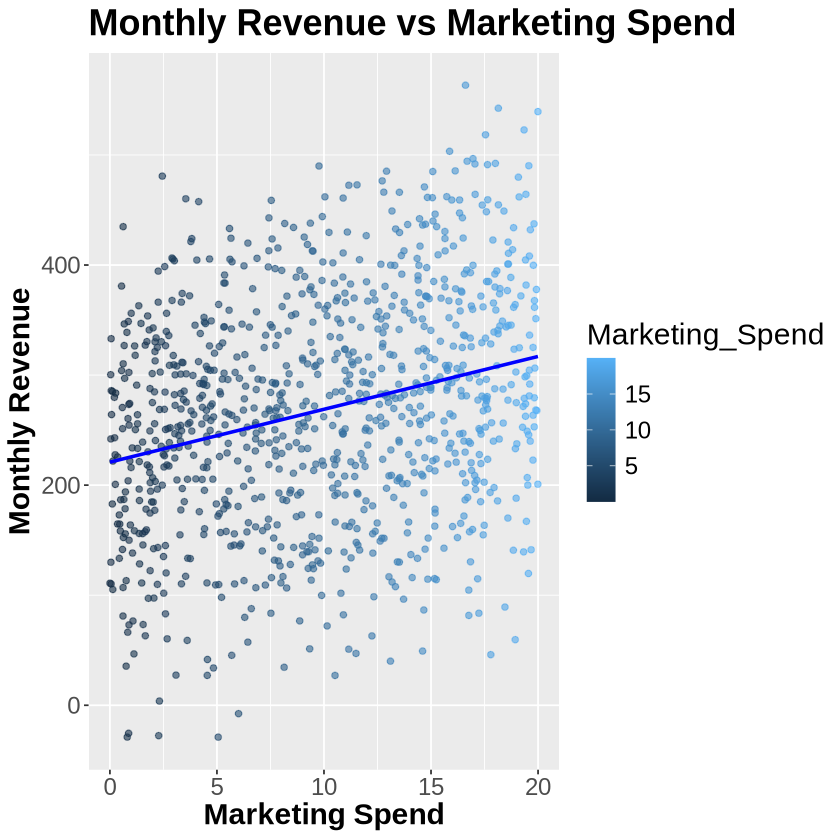

In [4]:
#visualization 1
monthly_revenue_vs_marketing_spend <- 
   restaurant_data %>%
   ggplot(aes(x = Marketing_Spend, y = Monthly_Revenue)) +
   geom_point(aes(color = Marketing_Spend), alpha = 0.6) +  # Scatter plot points
   geom_smooth(method = "lm", se = FALSE, color = "blue") +  # Linear regression line
   ggtitle('Monthly Revenue vs Marketing Spend') +
   xlab('Marketing Spend') +
   ylab('Monthly Revenue') +
   theme(
     text = element_text(size = 18),
     plot.title = element_text(face = "bold"),
     axis.title = element_text(face = "bold")
   )
monthly_revenue_vs_marketing_spend

This plot shows us the relationship between Marketing Spend and Monthly Revenue. As we can see, the general trend is that if the restaurant spends more on marketing, then it is predicted for the monthly revenue to increase as well. This plot is useful to answering our question as it helps us have a general idea of the relationship between Marketing Spend and Monthly Revenue and we can start adding in other factors to see how they affect this relationship as well.

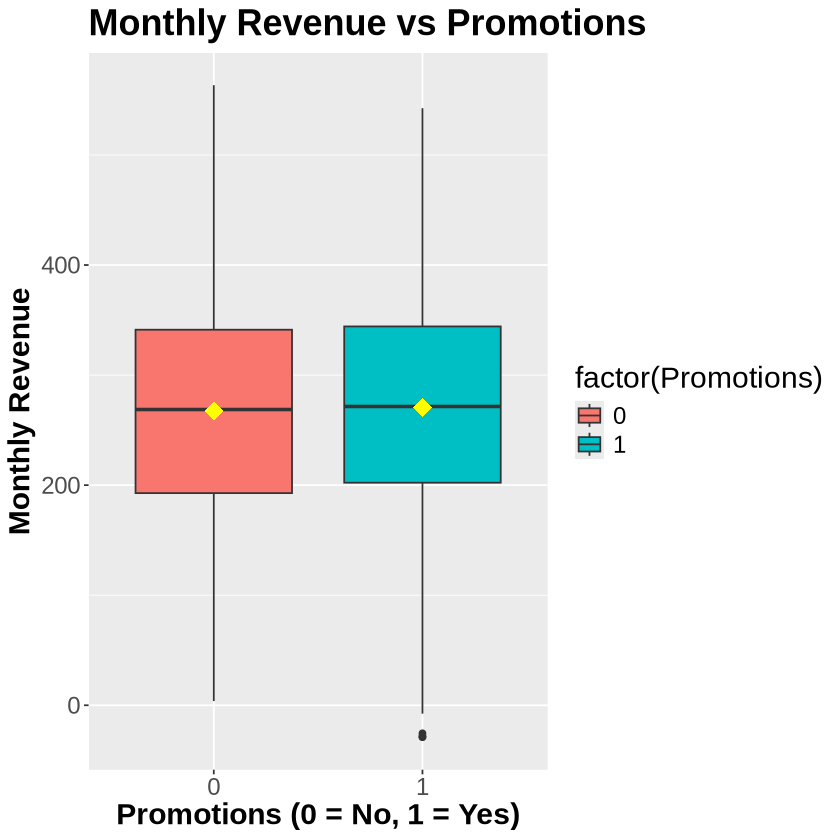

In [5]:
#visualization 2
monthly_revenue_boxplot <- 
   restaurant_data %>%
   ggplot() +
   geom_boxplot(aes(x = factor(Promotions), y = Monthly_Revenue, fill = factor(Promotions))) +
   ggtitle('Monthly Revenue vs Promotions') +
   xlab('Promotions (0 = No, 1 = Yes)') +
   ylab('Monthly Revenue') +
   stat_summary(aes(x = factor(Promotions), y = Monthly_Revenue),
     fun = 'mean', geom = "point", colour = "yellow", 
     shape = 18, size = 5
   ) +
   theme(
     text = element_text(size = 18),
     plot.title = element_text(face = "bold"),
     axis.title = element_text(face = "bold")
   )

monthly_revenue_boxplot

This boxplot shows us the mean monthly revenue for resturants that run promotions vs resturants that do not run promotions. As we can see, the two means are quite similar to each other which tells us that promotions may not have a significant impact on monthly revnue and that other factors may have a larger role in influencing monthly revenue. This plot is relevant to address my question and it tells me that I can spend my time exploring the effect of other factors instead of Promotions. 

## Methods

To answer our research question — **Is there an association between menu price, marketing spend, cuisine type, promotions, reviews, monthly revenue, and customer spend on the number of customers dining at a restaurant?** — we followed a structured modeling process centered around Poisson regression.

#### Data Preparation  
First, We started by cleaning the dataset and converting the categorical variable `Cuisine_Type` into a factor so that it could be properly handled in the regression. We then split the dataset into a **training set (80%)** and a **testing set (20%)** using the `initial_split()` function. This allowed us to build and tune the model on one part of the data and assess its performance on new, unseen data.

#### Model Selection  
Since our response variable, `Number_of_Customers`, is a **count variable**, we chose **Poisson regression** as our primary modeling method. Initially, we fit a full model with all available covariates (e.g., `Menu_Price`, `Marketing_Spend`, `Cuisine_Type`, `Promotions`, `Monthly_Revenue`, etc.). To simplify the model and reduce the risk of overfitting, we applied **backward stepwise selection** using the AIC criterion (via `stepAIC()`), which removes the least useful variables one at a time. We used `k = log(n)` to penalize model complexity — a technique known as the **Bayesian Information Criterion (BIC)** variant — which is more conservative and helps guard against overfitting.

#### Model Checking and Validation  
After selecting the model, we checked for **overdispersion**, which occurs when the variance of the response variable is larger than what the Poisson model assumes. We addressed this by fitting a **quasi-Poisson model** and examining the **dispersion parameter** and **residual plots**. We also tested for **multicollinearity** among predictors using **GVIF (Generalized Variance Inflation Factor)**, to ensure that no variables were too strongly correlated.

#### Final Model and Interpretation  
Our final model retained the variables **`Marketing_Spend`**, **`Menu_Price`**, **`Promotions`**, and **`Monthly_Revenue`** as significant predictors (*p* < 0.05). The coefficients showed that:

- **Marketing Spend** had a **negative** association with customer count — an unexpected result, possibly due to ineffective or misallocated marketing efforts.
- **Menu Price** also had a **negative** relationship, suggesting that higher prices may deter customers.
- **Promotions** had a **positive** effect, indicating that promotions were successful in attracting more customers.
- **Monthly Revenue** was positively associated with customer count, as expected.

To validate the model’s predictive performance, we applied it to the **test dataset** and examined residual plots and summary statistics. The residuals appeared centered and reasonably dispersed, indicating a good fit. The model also made logical sense based on domain knowledge, though the negative marketing effect prompts further investigation.

### StepAIC

In [4]:
#variable selection
set.seed(123)
#A/B) Write a computation code to implement the method proposed in part (1)

#Step 1: Process data
#Convert categorical variable "Cuisine_Type" to a factor
#Select the remaining columns for analysis to prepare for variable selection
restaurant <- restaurant %>%
    mutate(Cuisine_Type = as.factor(Cuisine_Type)) %>%
    dplyr::select(Number_of_Customers, Menu_Price, Marketing_Spend, 
           Cuisine_Type, Average_Customer_Spending, Promotions, 
           Reviews, Monthly_Revenue)

#Step 2: Split data into training and testing
#Use initial_split() function to divide restaurant data
#Training set will have 80% of the data and testing set will have 20% 
restaurant_split <- initial_split(restaurant, prop = 0.8)
training_restaurant <- training(restaurant_split)
testing_restaurant <- testing(restaurant_split)

#Step 3: Fit a poisson regression to the training data, with Number_of_Customers being the response variable
poisson_model <- glm(Number_of_Customers ~ ., data = training_restaurant, family = 'poisson')


#Step 4: Stepwise model selection using stepAIC()
#Use backward selection by starting with all covariates, and removing variables
n <- nrow(training_restaurant)
poisson_model_step <- stepAIC(poisson_model, direction = "backward", k = log(n))
summary(poisson_model_step)

Start:  AIC=9092.89
Number_of_Customers ~ Menu_Price + Marketing_Spend + Cuisine_Type + 
    Average_Customer_Spending + Promotions + Reviews + Monthly_Revenue

                            Df Deviance     AIC
- Cuisine_Type               3   4514.5  9084.9
- Reviews                    1   4503.0  9086.7
- Average_Customer_Spending  1   4504.6  9088.3
<none>                           4502.5  9092.9
- Promotions                 1   4513.4  9097.1
- Menu_Price                 1   4873.0  9456.7
- Marketing_Spend            1   5088.8  9672.5
- Monthly_Revenue            1  11190.8 15774.5

Step:  AIC=9084.88
Number_of_Customers ~ Menu_Price + Marketing_Spend + Average_Customer_Spending + 
    Promotions + Reviews + Monthly_Revenue

                            Df Deviance     AIC
- Reviews                    1   4514.9  9078.5
- Average_Customer_Spending  1   4517.0  9080.7
<none>                           4514.5  9084.9
- Promotions                 1   4525.2  9088.8
- Menu_Price         


Call:
glm(formula = Number_of_Customers ~ Menu_Price + Marketing_Spend + 
    Promotions + Monthly_Revenue, family = "poisson", data = training_restaurant)

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)    
(Intercept)      3.207e+00  1.932e-02  166.02  < 2e-16 ***
Menu_Price      -8.564e-03  4.437e-04  -19.30  < 2e-16 ***
Marketing_Spend -2.093e-02  8.638e-04  -24.23  < 2e-16 ***
Promotions       3.165e-02  9.706e-03    3.26  0.00111 ** 
Monthly_Revenue  4.235e-03  5.256e-05   80.57  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 11238.9  on 799  degrees of freedom
Residual deviance:  4517.2  on 795  degrees of freedom
AIC: 9050.8

Number of Fisher Scoring iterations: 4


Given these results, our final model will include the variables `Menu_Price`, `Marketing_Spend`, `Promotions`, and `Monthly_Revenue`

### Check for Overdispersion

To check for Overdispersion, we'll fit a model using the quasilikelihood method and check if the dispersion parameter is very different from 1. We'll also add in a residual plot to see the overdispersion visually

In [5]:
# Create quasipoisson model from training data
restaurant_quasipoisson <- glm(Number_of_Customers ~ Marketing_Spend + Menu_Price + Monthly_Revenue + Promotions,
                               data = training_restaurant, 
                               family = quasipoisson)
summary(restaurant_quasipoisson)


Call:
glm(formula = Number_of_Customers ~ Marketing_Spend + Menu_Price + 
    Monthly_Revenue + Promotions, family = quasipoisson, data = training_restaurant)

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)      3.2070634  0.0454193  70.610  < 2e-16 ***
Marketing_Spend -0.0209318  0.0020310 -10.306  < 2e-16 ***
Menu_Price      -0.0085644  0.0010433  -8.209 8.97e-16 ***
Monthly_Revenue  0.0042351  0.0001236  34.269  < 2e-16 ***
Promotions       0.0316453  0.0228208   1.387    0.166    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for quasipoisson family taken to be 5.528046)

    Null deviance: 11238.9  on 799  degrees of freedom
Residual deviance:  4517.2  on 795  degrees of freedom
AIC: NA

Number of Fisher Scoring iterations: 4


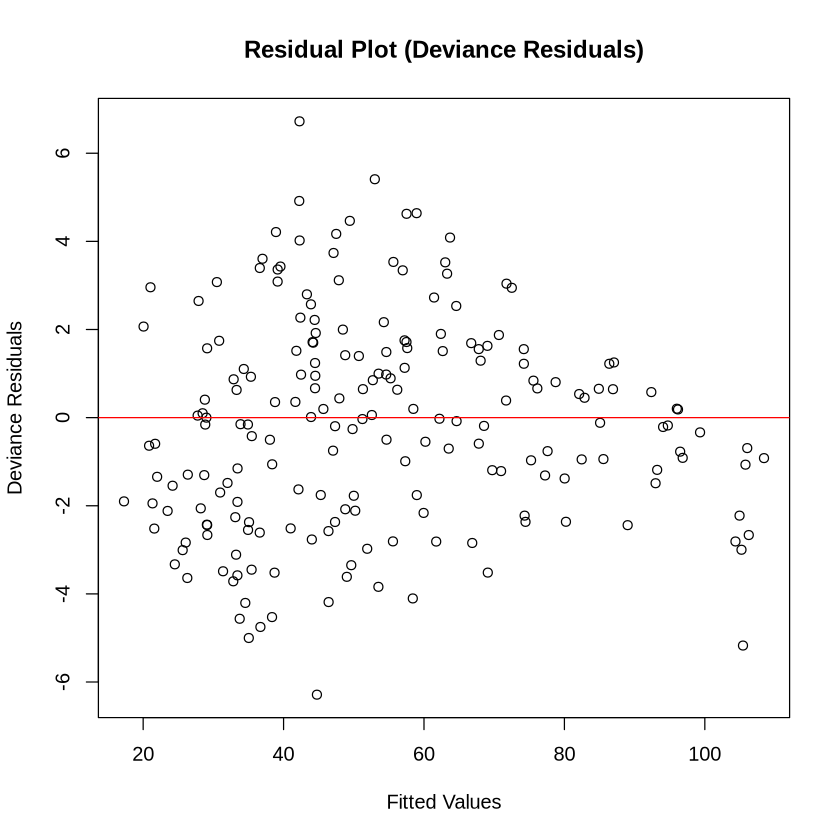

In [21]:
# Plot deviance residuals against fitted values
plot(poisson_test$fitted.values, residuals(poisson_test, type = "deviance"), 
     xlab = "Fitted Values", ylab = "Deviance Residuals", 
     main = "Residual Plot (Deviance Residuals)")

# Add a horizontal line at zero to check if the residuals are centered around zero
abline(h = 0, col = "red")

Since there is overdispersion, our final model will continue to use the quasipoisson family as it accounts for overdispersion by adjusting the standard errors

### Check for Multicollinearity

Now we can check for multicollinearity in our model with the GVIF values.

In [24]:
# Obtain GVIF values
vif(restaurant_quasipoisson)

Marketing_Spend      Menu_Price Monthly_Revenue      Promotions 
       1.112210        1.077805        1.192864        1.000765

Since all the features have a GVIF score close to 1, it indicates low multicollinearity between them

### Creating Poisson Regression Model

Now we'll create our final model on the testing data

In [27]:
# Create quasipoisson model from testing data
poisson_test <- glm(Number_of_Customers ~ Marketing_Spend + Menu_Price + Monthly_Revenue + Promotions,
                    data = testing_restaurant,
                    family = "quasipoisson")

# Create summary for final model
sum_poisson <- summary(poisson_test)

# Visualize results in a Data Frame
table_poisson <- data.frame(
    estimate = sum_poisson$coefficients[, 1],
    std_error = sum_poisson$coefficients[, 2],
    p_value = sum_poisson$coefficients[, 4])
table_poisson

,estimate,std_error,p_value
,<dbl>,<dbl>,<dbl>
(Intercept),3.200004508,0.095337512,5.773720e-83
Marketing_Spend,-0.024244831,0.004373587,9.545002e-08
Menu_Price,-0.007867671,0.002108405,2.495268e-04
Monthly_Revenue,0.004203466,0.000248556,4.334775e-40
Promotions,0.087117546,0.046589366,6.299617e-02


> From computing a Poisson regression from the selected covariates using stepAIC(), we can see that `Marketing_Spend`, `Menu_Price`, `Promotions`,and `Monthly_Revenue` are statistically significant at a 0.05 significance level, as they all have p-values less than the significance level. Based on their coefficients, we can observe that marketing spend and menu price are negatively associated with the number of customers in a restaurant—this is unexpected for marketing spend, as we would expect that if we spend more on marketing, the number of customers will increase. Monthly revenue and promotions are positively associated with the number of customers. 

# Discussion

**Summary of Findings and Implications**

Our final model found that `Marketing_Spend` and `Menu_Price` are significantly, negatively associated with `Number_of_Customers`, but `Monthly_Revenue` displayed a strong positive association. `Promotions` had a positive but statistically insignificant association (p = 0.06 > 0.05). These results suggest that pricing and revenue are key drivers of customer turnout, while high marketing spend doesn't always lead to more customers, possibly due to less effective campaign strategies.

**Were the Results Expected?**

The negative association between `Menu_Price` and customer count was expected since higher prices often deter budget-conscious customers, especially in more casual dining settings. The positive impact of `Monthly_Revenue` was also expected since more customers generally correlate with higher spend, and thus, higher revenue, assuming the restaurant primarily generates revenue through serving food to customers. However, the negative effect of `Marketing_Spend` was unexpected - typically, we would anticipate that increased marketing efforts attract more customers, which boosts organic growth and thus revenue, but this result may reflect inefficient campaign strategies or poor targeting. The effect of `Promotions` was statistically insignificant (p ≈ 0.063), which was interesting and surprising given that the common expectation is that applying promotions grow awareness and boost customer foot traffic. This suggests that their impact may vary depending on timing, type, or how well they align with the customers' preferences.

**Model Improvement**

Future iterations of this model and project could better benefit from including interaction terms (for example, between `Promotions` and `Menu_Price`), adding nonlinear effects to capture thresholds, or incorporating categorical variables like `Cuisine_Type`, which were dropped during model selection. Temporal data (e.g., weekday vs. weekend patterns) and more granular marketing quality metrics could also refine predictions.

**Future Research**

Building on this project, a future analysis could explore how digital reviews, availability of deliveries, or location, influence customer count. Also, tracking customer loyalty or repeat visits could help better understand not just what attracts customers, but what retains them and limits churn. A time-series component would also allow for seasonal trend modeling, which would hopefully improve long-term forecasting.

# References

Liu, P., & Tse, E. C. (2018). Exploring factors on customers’ restaurant choice: An analysis of restaurant attributes. *British Food Journal, 120*(10), 2289-2303. https://doi.org/10.1108/BFJ-10-2017-0561

MrSimple07. (n.d.). Restaurants revenue prediction [Data set]. Kaggle. https://www.kaggle.com/datasets/mrsimple07/restaurants-revenue-prediction

Yi, S., Zhao, J., & Joung, H. W. (2018). Inﬂuence of price and brand image on restaurant customers’restaurant selection attribute. *Journal of Foodservice Business Research, 21*(2), 200-217. https://doi.org/10.1080/15378020.2017.1368808© 2017 Taylor & Francis 